In [40]:
import os
from os import path
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crashedbboy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
DATASET_DIR = "../../fakenewsnet_dataset"
DATASET_DIR = path.abspath( DATASET_DIR )

NEWS_DIR = f"{DATASET_DIR}/politifact/fake"

In [4]:
def tree_size(root_node):

    node_count = 1 # itself

    children = [] + root_node["quoted_by"] + root_node["replied_by"] + root_node["retweeted_by"]
    for child in children:
        node_count += tree_size(child)

    return node_count

In [5]:
news_count = 0
sizes = []
news_texts = []
for item in os.listdir(NEWS_DIR):
    news_dir_path = f"{NEWS_DIR}/{item}"
    
    if path.isdir(news_dir_path):

        if not path.exists(f"{news_dir_path}/news content.json"):
            continue

        if not path.exists(f"{news_dir_path}/cascade.json"):
            continue

        news_count += 1
        print(f"{news_count}: {item}")
#         if news_count > 5:
#             break

        with open(f"{news_dir_path}/news content.json", "r") as news_file:
            news_texts.append(json.loads(news_file.read())["text"])

1: politifact13038
2: politifact13467
3: politifact13468
4: politifact13475
5: politifact13496
6: politifact13501
7: politifact13515
8: politifact13557
9: politifact13559
10: politifact13560
11: politifact13561
12: politifact13565
13: politifact13576
14: politifact13577
15: politifact13584
16: politifact13591
17: politifact13593
18: politifact13600
19: politifact13601
20: politifact13608
21: politifact13617
22: politifact13663
23: politifact13687
24: politifact13698
25: politifact13703
26: politifact13711
27: politifact13720
28: politifact13731
29: politifact13744
30: politifact13747
31: politifact13751
32: politifact13765
33: politifact13766
34: politifact13773
35: politifact13775
36: politifact13784
37: politifact13794
38: politifact13806
39: politifact13807
40: politifact13815
41: politifact13816
42: politifact13823
43: politifact13827
44: politifact13836
45: politifact13853
46: politifact13854
47: politifact13893
48: politifact13897
49: politifact13913
50: politifact13921
51: polit

In [6]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(news_texts) # compute tf-idf
feature_names = vectorizer.get_feature_names() # get all words (to be header of dataframe)
dense = vectors.todense()
dense_list = dense.tolist()
tfidf_df = pd.DataFrame(dense_list, columns=feature_names)

In [7]:
tfidf_df

,00,000,00654,007,00pm,01,01573,016,02,029,...,этого,этот,эту,яндекс,因为专业所以专注研发型企业给你好的护栏装璜research,建立新帳號,日新丸,查看更多有關,登入,的資訊
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.406441,0.0,0.406441,0.406441,0.406441
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.024616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0.0,0.030843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
335,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
336,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
337,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [31]:
en_stop_words = stopwords.words('english')


def custom_stopword_filter(word):
    stop_words = [
        'com',
        'http',
        '00',
        'www',
        'mr',
        'https'
    ]
    
    if word in stop_words or len(word) > 30:
        return False
    else:
        return True

In [32]:
top_tfidf_words = []

for i in range(tfidf_df.shape[0]):
    collected_count = 0
    while collected_count < 3:
        word = tfidf_df.iloc[i].idxmax(axis = 1)
        if word not in en_stop_words:
            collected_count += 1
            top_tfidf_words.append(word)
        tfidf_df.iloc[i][word] = 0
        
print(f"collected {len(top_tfidf_words)} words!")

collected 1017 words!


In [33]:
top_tfidf_words = [word for word in top_tfidf_words if custom_stopword_filter(word) == True]
print(f"{len(top_tfidf_words)} words after filtering")

858 words after filtering


In [36]:
top_tfidf_words

['archetypal',
 'assert',
 'aura',
 'praised',
 'need',
 'hired',
 'protester',
 'battles',
 'dad',
 'based',
 'cable',
 'fake',
 'self',
 'men',
 'stop',
 'post',
 'concerned',
 'russians',
 'house',
 'ivanka',
 'tradition',
 'others',
 '236',
 'antidepressants',
 'describing',
 'express',
 'fans',
 'overheated',
 'shankbone',
 'tow',
 'bellow',
 'caregiver',
 'grandma',
 'asshole',
 'conceding',
 'drag',
 'united',
 'everything',
 'donald',
 'fondly',
 'saxophones',
 'sized',
 'like',
 'bill',
 'basically',
 '10',
 'young',
 'month',
 'leader',
 'order',
 'national',
 'deals',
 'traveling',
 'organizations',
 'points',
 'discuss',
 'biggest',
 'less',
 'uses',
 'available',
 'form',
 'necessary',
 'online',
 'unconstitutional',
 'blind',
 'dakota',
 'president',
 'trump',
 'prime',
 'fear',
 'forced',
 'allowed',
 'hunt',
 'killer',
 'within',
 'goodfellow',
 'ncrenegade',
 'phasing',
 'form',
 'necessary',
 'online',
 'news',
 'illegal',
 'free',
 'keep',
 'time',
 'advertisement',


In [37]:
all_topwords_text = " ".join(top_tfidf_words)

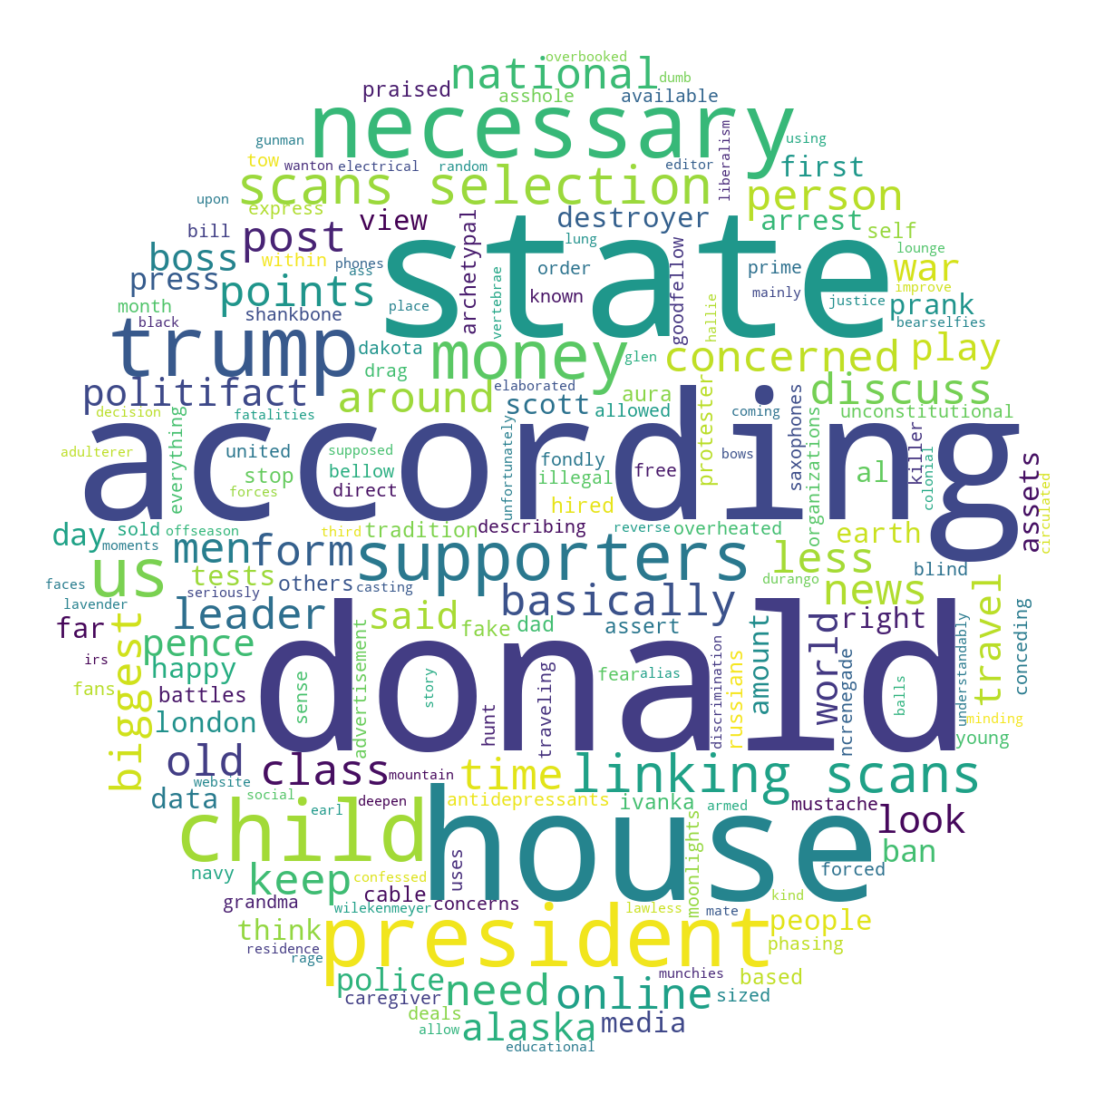

In [76]:
x, y = np.ogrid[:1200, :1200]

mask = (x - 600) ** 2 + (y - 600) ** 2 > 560 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(max_words=200, background_color="white", mask = mask, width=1200, height=1200).generate(all_topwords_text)
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

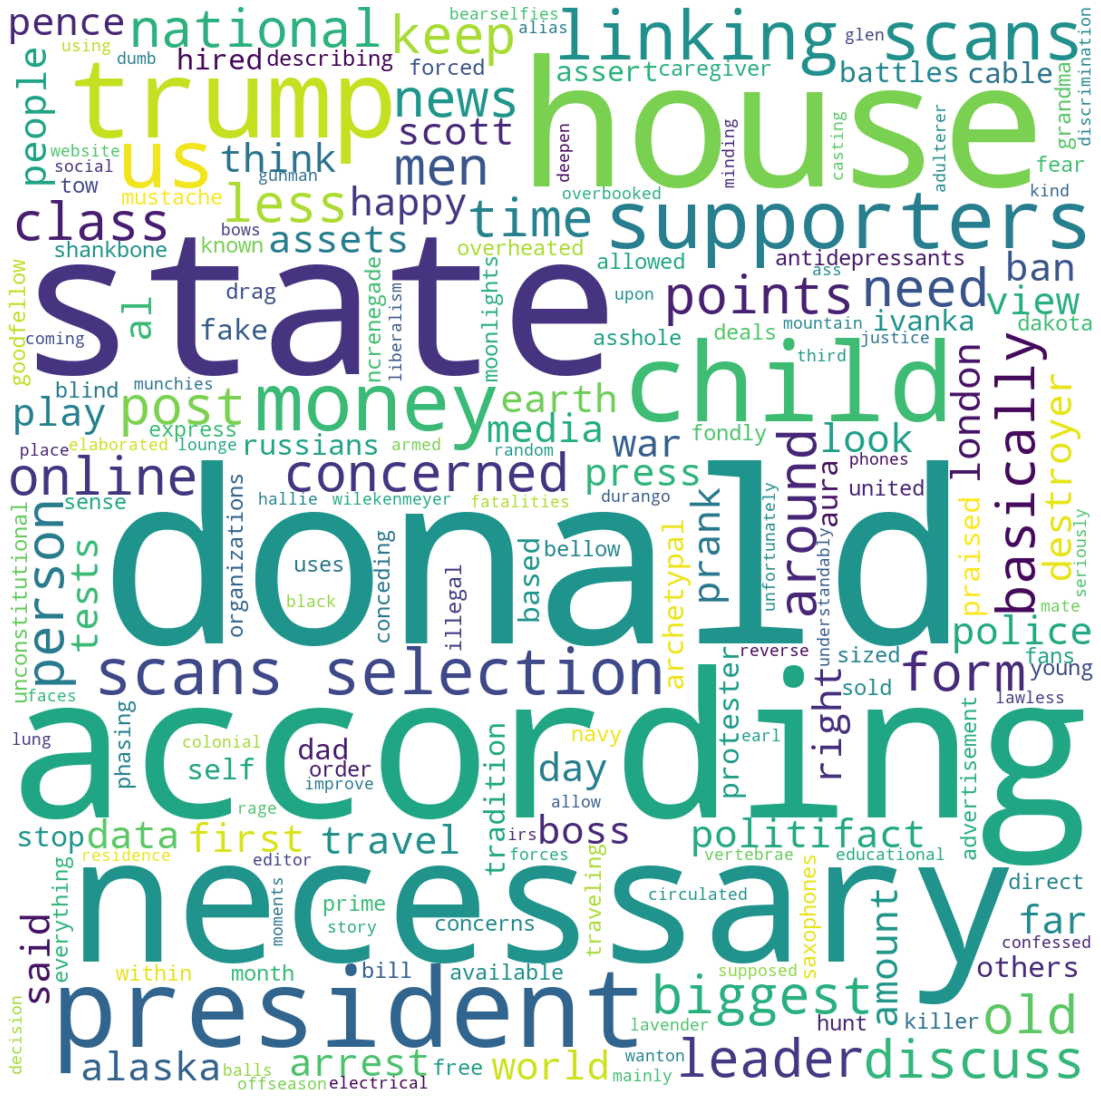

In [79]:
wordcloud = WordCloud(max_words=200, background_color="white", width=1200, height=1200).generate(all_topwords_text)
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()